In [3]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout


In [12]:
parent_dir = 'D:/signs/classes'
images = []
labels = []

for i,folder in enumerate(os.listdir(parent_dir)):
    path = os.path.join(parent_dir,folder)
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(str(path+'/'+j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = np.array(image)
            images.append(image)
            label = np.zeros(198)
            label[int(folder)] = 1.0
            labels.append(label)
        except:
            pass

In [13]:
images = np.array(images)
images = images/255
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (101071, 32, 32)
Labels shape: (101071, 198)


In [14]:
X = images.astype(np.float32)
y = labels.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (80856, 32, 32)
y_train shape: (80856, 198)
X_test shape: (20215, 32, 32)
y_test shape: (20215, 198)


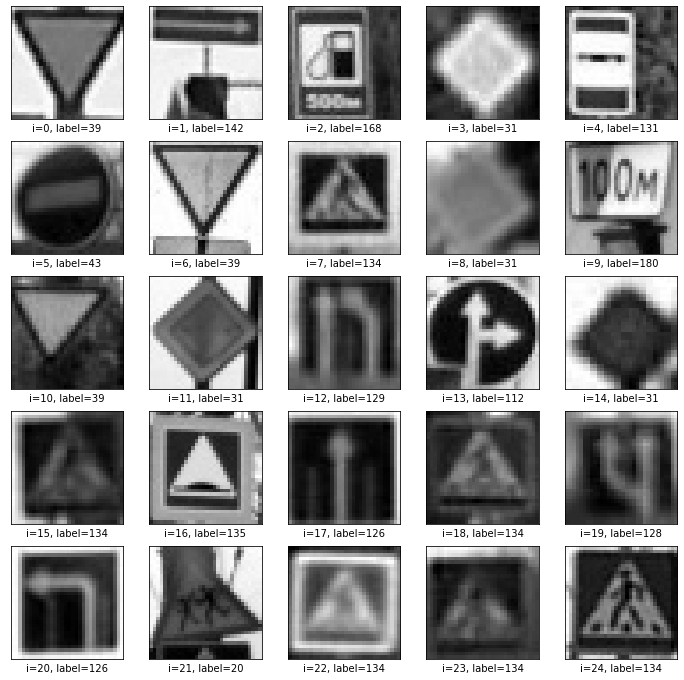

In [15]:
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i], cmap='gray')
plt.show()

In [16]:
model = Sequential([Rescaling(1, input_shape=(32, 32, 1)), # building the model
                    Conv2D(filters=6, kernel_size=(5, 5), activation='relu'),
                    AveragePooling2D(pool_size=(2, 2)),
                    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
                    AveragePooling2D(pool_size=(2, 2)),
                    Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
                    Dropout(0.2),
                    Flatten(),
                    Dense(units=120, activation='relu'),
                    Dense(units=198, activation='softmax')])


model.compile(optimizer='adam', # compilation of the model
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary() # show model architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         4

In [7]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
2495/2495 [==============================] - 46s 18ms/step - loss: 1.5886 - accuracy: 0.6284 - val_loss: 0.7792 - val_accuracy: 0.8018
Epoch 2/50
2495/2495 [==============================] - 43s 17ms/step - loss: 0.7751 - accuracy: 0.8020 - val_loss: 0.5391 - val_accuracy: 0.8600
Epoch 3/50
2495/2495 [==============================] - 43s 17ms/step - loss: 0.5700 - accuracy: 0.8492 - val_loss: 0.4072 - val_accuracy: 0.8923
Epoch 4/50
2495/2495 [==============================] - 41s 16ms/step - loss: 0.4574 - accuracy: 0.8757 - val_loss: 0.3476 - val_accuracy: 0.9142
Epoch 5/50
2495/2495 [==============================] - 44s 18ms/step - loss: 0.3880 - accuracy: 0.8945 - val_loss: 0.2973 - val_accuracy: 0.9212
Epoch 6/50
2495/2495 [==============================] - 40s 16ms/step - loss: 0.3404 - accuracy: 0.9060 - val_loss: 0.2735 - val_accuracy: 0.9273
Epoch 7/50
2495/2495 [==============================] - 44s 18ms/step - loss: 0.3077 - accuracy: 0.9146 - val_loss: 0.2359 -

In [8]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nValidation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

624/624 - 5s - loss: 0.1677 - accuracy: 0.9601 - 5s/epoch - 7ms/step

Validation accuracy: 0.9601122736930847

Validation loss: 0.16772137582302094


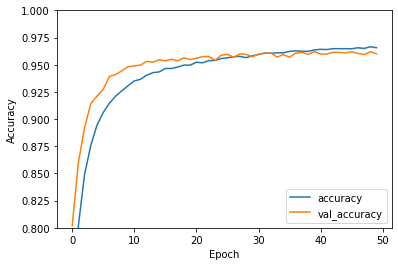

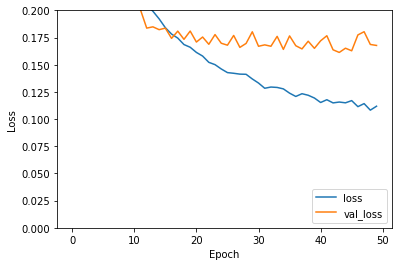

In [9]:


plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='lower right')



In [19]:
labels_csv = pd.read_csv('D:/signs/labels.csv')

In [22]:
labels_dict = dict(zip(labels_csv['ClassId'],labels_csv['SignName']))

In [12]:
labels_dict

{1: 'Знак 1.1. Железнодорожный переезд со шлагбаумом',
 2: 'Знак 1.10. Выезд на набережную',
 3: 'Знак 1.11.1. Опасный поворот (правый)',
 4: 'Знак 1.11.2. Опасный поворот (левый)',
 5: 'Знак 1.12.1. Опасные повороты (с первым поворотом направо)',
 6: 'Знак 1.12.2. Опасные повороты (с первым поворотом налево)',
 7: 'Знак 1.13. Крутой спуск',
 8: 'Знак 1.14. Крутой подъем',
 9: 'Знак 1.15. Скользкая дорога',
 10: 'Знак 1.16. Неровная дорога',
 11: 'Знак 1.17. Искусственная неровность',
 12: 'Знак 1.18. Выброс гравия',
 13: 'Знак 1.19. Опасная обочина',
 14: 'Знак 1.2. Железнодорожный переезд без шлагбаума',
 15: 'Знак 1.20.1. Сужение дороги',
 16: 'Знак 1.20.2. Сужение дороги ',
 17: 'Знак 1.20.3. Сужение дороги',
 18: ' Знак 1.21. Двустороннее движение',
 19: 'Знак 1.22. Пешеходный переход',
 20: 'Знак 1.23. Дети',
 21: 'Знак 1.25. Дорожные работы',
 22: 'Знак 1.26. Перегон скота',
 23: 'Знак 1.27. Дикие животные',
 24: 'Знак 1.30. Низколетящие самолеты',
 25: 'Знак 1.31. Тоннель',
 26

632/632 [==============================] - 3s 4ms/step


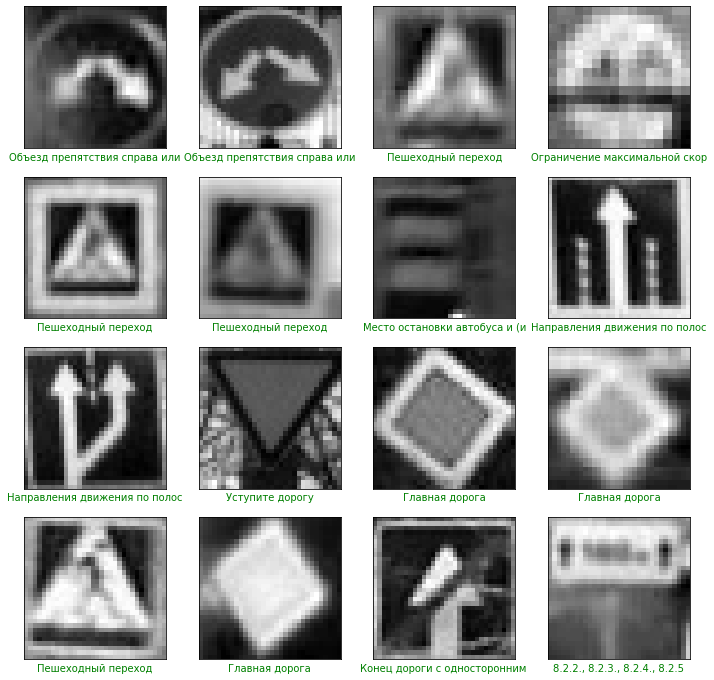

In [134]:
import random

preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 10000)
for i in range(1,17):
    plt.subplot(4, 4, i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    name = ' '.join(labels_dict[np.argmax(y_test[start_index+i])].split()[2:])[:29]
    
    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel('{}'.format(name), color=col)
#     plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='gray')
plt.show()



In [135]:
model.save('D:/signs/') #save model

In [17]:
model = tf.keras.models.load_model('D:/signs/') #load model